<a href="https://colab.research.google.com/github/ShivinM-17/Tensorflow_practises/blob/main/Time_series_forcasting_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time series forecasting fundamentals and Milestone project: BitPredict

Here, we will try to predict the price of bitcoins based on the historical price of it.

### Getting the data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-12-05 09:15:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.007s  

2023-12-05 09:15:59 (25.8 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



### Importing time-series data with pandas

In [ ]:
# Import with pandas
import pandas as pd

# Reading and parsing the time-series data
df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates = ['Date'],
                 index_col = ['Date'])  # parse the data column and tell column 1 is a data-time column
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
# Checking out the count of samples
len(df)

2787

In [ ]:
# how many years of data we have?
len(df) // 365 + 1

8

We have the historical price of BitCoin for the past ~8 years , i.e. about 2787 records.

Normally, deep learning models require large amounts of data (close to tens of thousands to millions)

Normally, time-series data will have smaller amounts of samples.

`NOTE`: The `seasonality` of the time-series datasets is referred as the number of samples of data per year. For our data, it has seasonality of daily value of 365, since we collect one sample per day, getting about 365 samples per year.

### Visualizing the time-series data

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


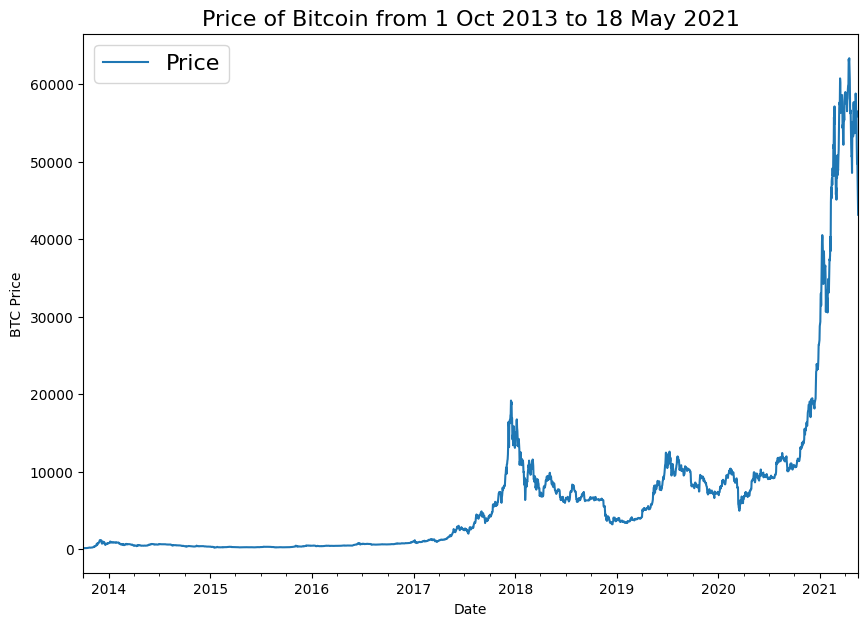

In [ ]:
# Plot the price data
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=16);

### Importing time series data with Python's CSV module

In [ ]:
# Importing and formatting historical BitCoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader)  # skip first line (which consists of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))  # get the dates as dates dtype (not string)
    btc_price.append(float(line[2]))  # get closing price as float dtype

# View first 10 of timesteps and btcprice
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

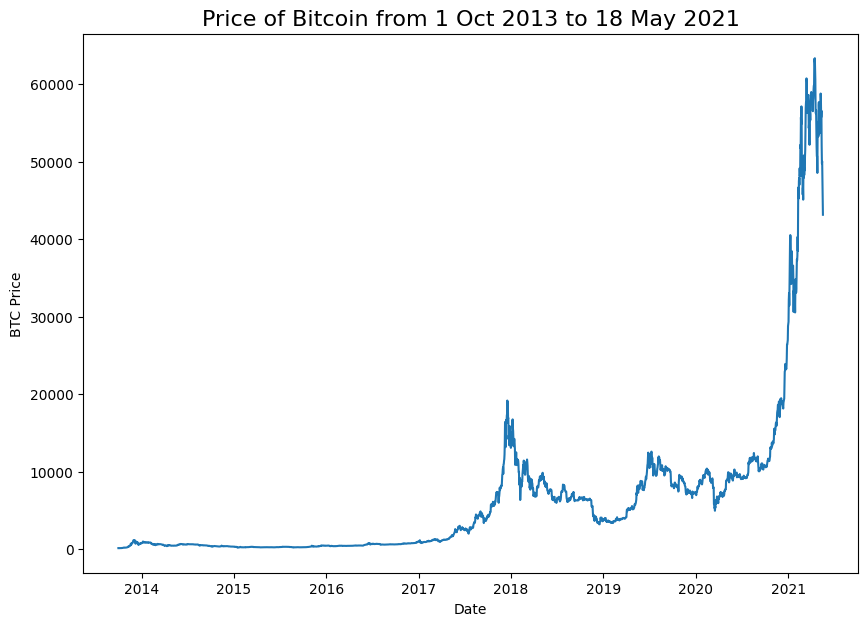

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16);

### Format data 1: Creating train and test sets of the time-series data

#### Wrong way: Creating train and test sets of the data

In [ ]:
bitcoin_prices[:10]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866
2013-10-06,120.65533
2013-10-07,121.79500
2013-10-08,123.03300
2013-10-09,124.04900


In [ ]:
# Get bitcoin data array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets of the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size = 0.2,
                                                    random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

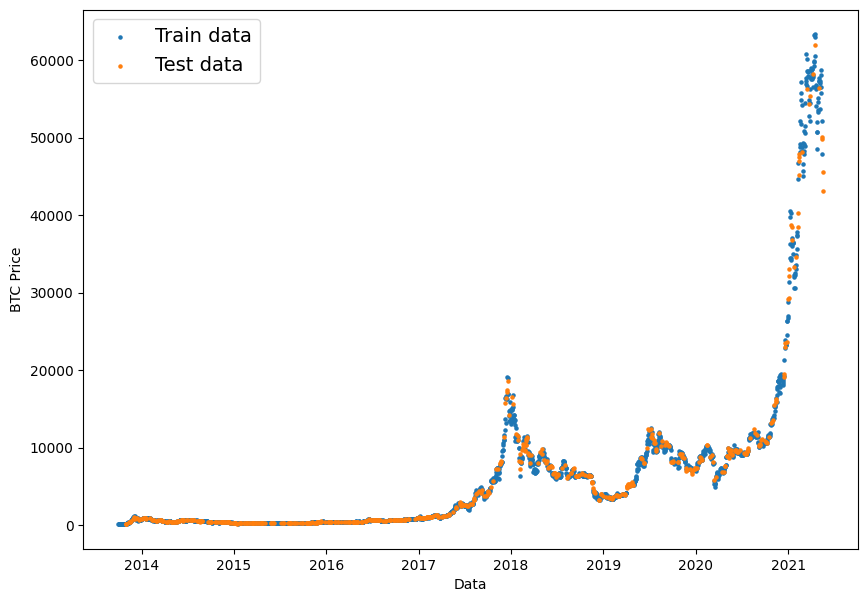

In [ ]:
# Plotting the wrong train/test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Data')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show();

`**Why this method of making train/test split wrong?**`

This is because, since we want to make the model to predict the bitcoin prices of the future using the historical prices of the past, by splitting the data randomnely, the model losses its ability to correct use the past data to predict the future prices. This is because since the random train data is not continuous and split randomnly, the model is not able to predict correctly, since predicting such data requires correct and continuous involvement of the past data.

Thus, this can be said a data leak issue for this case.

#### Create train and test sets for the time series (right way)

In [ ]:
# Creating the train and test sets
split_size = int(0.8 * len(prices)) # 80% train, 20% test split

# Create train data split
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data split
X_test, y_test = timesteps[split_size:], prices[split_size:]

# Checking out the length of the train and test sets of the time-series data
len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

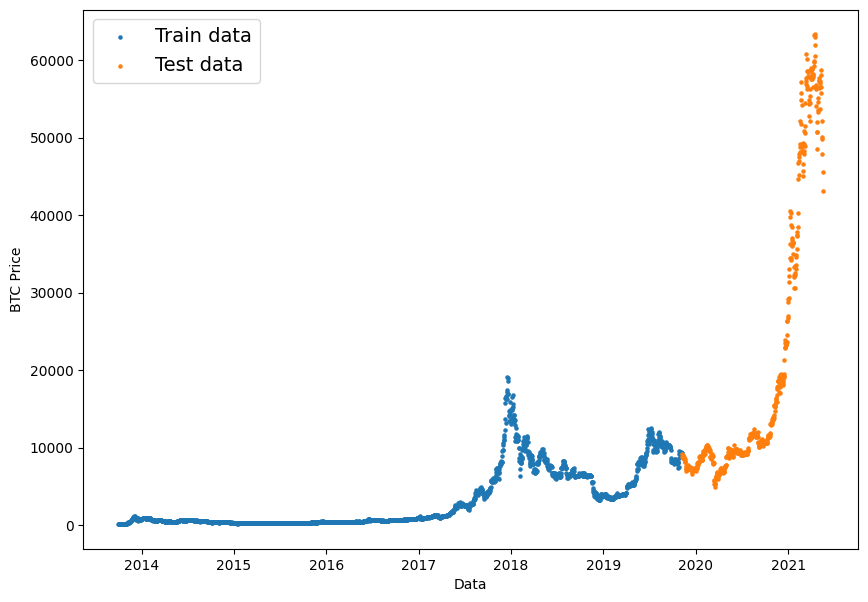

In [ ]:
# Plotting the wrong train/test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Data')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show();

### Creating a plotting function to visualize the data

In [ ]:
# Create function to plot the time-series data
def plot_time_series(timesteps, values, format='.', start = 0,end = None, label = None):
  """
  Plot timesteps (a series of points in time) against values(series of values across price range)

  Parameters:
    timesteps: arrays of timestep values
    values: array of price values across time
    format: style to plot, default = '.'
    start: where to start the plot (setting a value with index from start of timestep)
    end: where to end the plot
    label: label to show on plot about values , default = None
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

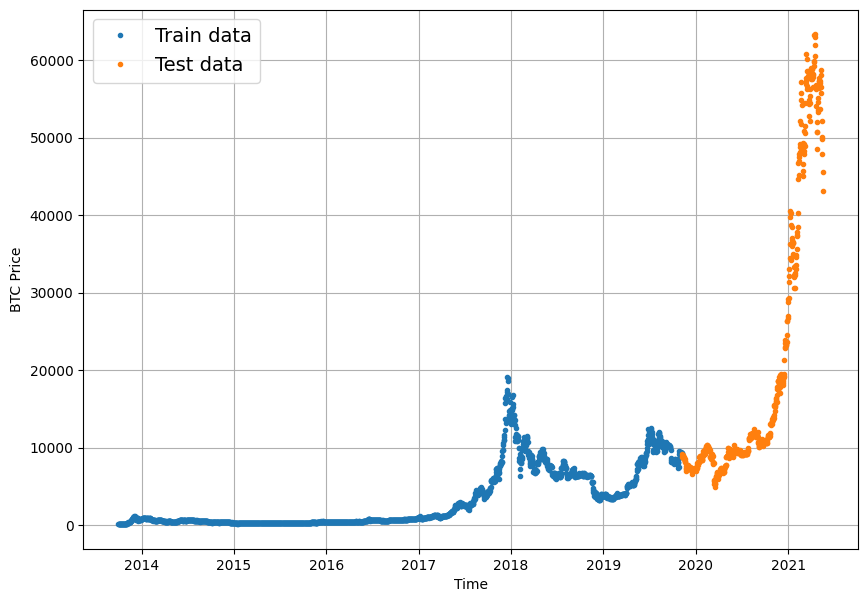

In [ ]:
# Testing out the plotting function
plt.figure(figsize=(10, 7))

plot_time_series(timesteps = X_train, values = y_train, label='Train data')
plot_time_series(timesteps = X_test, values = y_test, label='Test data')

### Modelling experiments

We will be running a series of modelling experiments, to be modelled based on the time-series bitcoin price data.

Terms to be familiar with:
* **Horizon**: number of timesteps into the future we're going to predict
* **Window size**: number of timesteps we're going to use to predict **horizon**

Here are the series of the modelling experiments:
* model 0: Naive Bayes model (Baseline)
* model 1: Dense model, horizon = 1, window = 7
* model 2: Same as model 1, horizon = 1, window = 30
* model 3: Same as model 1, horizon = 7, window = 30
* model 4: Conv1D
* model 5: LSTM
* model 6: Same as 1 (but with multivariate data)
* model 7: N-BEATs Algorithm
* model 8: Ensemble (multiple models optimized on different loss functions)
* model 9: Future prediction model (to predict the future data)
* model 10: same as model 1 (but with turkey data introduced)

### Model 0: Naive forecast baseline model

The naive bayes formula is as given below:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y_hat) is equal to the value of the timestep t - 1 (previous timestep) :  this is for horizon = 1

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

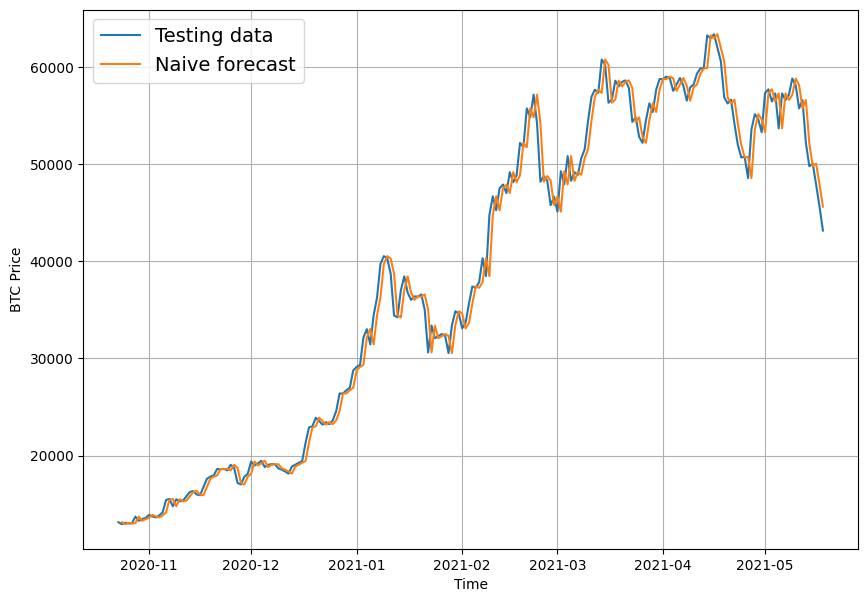

In [ ]:
# Plot naive forcast
plt.figure(figsize = (10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label = 'Training data')
plot_time_series(timesteps=X_test, values=y_test,start = 350, format='-', label = 'Testing data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start = 350, format='-', label = 'Naive forecast')

### Evaluating the time-series model

Checking out some evaluation metrics for time-series forecasting.

Since we are predicting a number, this means that we have a form of a regression problem.

Since we're working on regression model, we will have to use regression-like metrics.

Some of them are:
* MAE: Mean Absolute Error
* MSE: Mean Squared Error
* Huber loss
* RMSE: Root Mean Squared error
* MAPE / sMAPE: (Symmetric) Mean absolute error
* MASE: Mean absolute scaled error

`NOTE`: lower values of these metrics is better

> The main thing we're evaluating here is:
**how do our model's forecast (y_pred) compare against the actual values (y_true or ground truth value)?**

In [ ]:
import tensorflow as tf

#### MASE Implementation

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data)
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))  # here, seasonality is 1 day

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true = y_test[1:],
                           y_pred = naive_forecast).numpy()

0.9995699939182624

#### Create a function to take in model predictions and truth values and return evaluation metrics

In [ ]:
y_test[0].dtype

dtype('float64')

In [ ]:
def evaluate_preds(y_true, y_pred):
  # data must in float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  # Calculate evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy()}

In [ ]:
# Checking out the evaluation function
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
# checking out the last 10 forecast
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

According to the `mae` i.e. equal to `567.9802`, from this value, we can infer that the prediction values we get from the model have absolute differences of about 567 for each on average.

In [ ]:
# average bitcoin price
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [ ]:
# Maximum and minimum bitcoin prices
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

### Format data part 2: Windowing the data

We window the time-series dataset to turn the data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [ ]:
y_train, len(y_train)

(array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
        9326.59962378, 9335.75240233]),
 2229)

In [ ]:
# What we want to do with the BitCoin data
print(f"We want to use: {btc_price[:7]}\nto predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795]
to predict this: 123.033


In [ ]:
# Setting up global variables for windows and horizon size
HORIZON = 1   # predict next 1 day
WINDOW_SIZE = 7  # use the past week of BitCoin data to make prediction

In [ ]:
# Create function to create windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.
  e.g. if horizon = 1,
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Checking out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window : {tf.squeeze(test_window).numpy()} -> Label : {tf.squeeze(test_label).numpy()}")

Window : [0 1 2 3 4 5 6] -> Label : 7


In [ ]:
tf.expand_dims(tf.range(8), axis=0)[:,]

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

The above method only works on a small scale.

But, we need to do the above on the whole time-series data.

Here, we'll use Numpy array indexing method, instead of using python loops, since this is a faster method to use.

Here, the function will:                 
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use Numpy indexing to create a 2D array of multiple window steps, for e.g. -
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from step - 2) to index on a target series (e.g. the historical price of BitCoin)                              
4. Uses the get_labelled_windows() function to turn the window steps into windows with a specific horizon.

In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 5 window / labels
for i in range(5):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]} \n")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033] 

Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049] 

Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116] 

Window: [118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116] -> Label: [125.27966] 

Window: [121.33866 120.65533 121.795   123.033   124.049   125.96116 125.27966] -> Label: [125.9275] 



### Turning windows into training and testing sets

In [ ]:
# Make the train / test splits
def make_train_test_splits(windows, labels, test_split = 0.2):
  """
  Splits matching pairs of windows and labels into training and test splits
  """
  split_size = int(len(windows) * (1 - test_split))  # this will default to 80% train, 20% test

  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels


In [ ]:
# Create the train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
# Checking out the first 5 elements of the train and test data splits
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Check to see if the train labels are the same (before and after window splits)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

### Importing helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-12-05 09:16:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-12-05 09:16:12 (74.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import *

### Making modelling checkpoint

Since the model's performances will fluctuate from experiment to experiment, therefore, we will write a modelcheckpoint to compare different models best performances

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path = 'model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            monitor = 'val_loss',
                                            verbose = 0, # only output a limited amount of text
                                            save_best_only = True
                                            )

### Model 1: Dense model (window = 7, horizon = 1)

This model will be a simple dense model with the given structure:                
* A single dense layer with 128 hidden layer units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we've used 32)
* Run the model for 100 epochs



In [ ]:
train_windows, len(train_windows)

(array([[ 123.65499   ,  125.455     ,  108.58483   , ...,  121.33866   ,
          120.65533   ,  121.795     ],
        [ 125.455     ,  108.58483   ,  118.67466   , ...,  120.65533   ,
          121.795     ,  123.033     ],
        [ 108.58483   ,  118.67466   ,  121.33866   , ...,  121.795     ,
          123.033     ,  124.049     ],
        ...,
        [9225.99547934, 9131.41063031, 9197.63234462, ..., 9202.41545055,
         9369.62808116, 9326.59962378],
        [9131.41063031, 9197.63234462, 9290.89660239, ..., 9369.62808116,
         9326.59962378, 9335.75240233],
        [9197.63234462, 9290.89660239, 9202.41545055, ..., 9326.59962378,
         9335.75240233, 9226.48582088]]),
 2224)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')  # linear activation is same as having no activation
], name = 'model_1_dense')

# compile the model
model_1.compile(loss='mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mse', 'mae'])

# Fit the model
model_1_history = model_1.fit(x = train_windows,
                              y = train_labels,
                              epochs = 100,
                              verbose = 1,
                              batch_size = 128,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name=model_1.name)]
                              )

Epoch 1/100
18/18 [==============================] - 8s 133ms/step - loss: 1177.2321 - mse: 5142611.0000 - mae: 1177.2321 - val_loss: 2775.9546 - val_mse: 15983093.0000 - val_mae: 2775.9546
Epoch 2/100
18/18 [==============================] - 1s 50ms/step - loss: 251.2940 - mse: 270212.9688 - mae: 251.2940 - val_loss: 882.4362 - val_mse: 2448443.7500 - val_mae: 882.4362
Epoch 3/100
18/18 [==============================] - 1s 45ms/step - loss: 147.7718 - mse: 109638.5703 - mae: 147.7718 - val_loss: 735.5672 - val_mse: 1815497.1250 - val_mae: 735.5672
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 131.9426 - mse: 98041.4141 - mae: 131.9426 - val_loss: 748.8839 - val_mse: 1774611.3750 - val_mae: 748.8839
Epoch 5/100
18/18 [==============================] - 1s 61ms/step - loss: 129.2516 - mse: 95788.4609 - mae: 129.2516 - val_loss: 715.6214 - val_mse: 1728498.7500 - val_mae: 715.6214
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 133.2291

In [ ]:
# Evaluate the model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 629.9429 - mse: 1280454.0000 - mae: 629.9429


[629.94287109375, 1280454.0, 629.94287109375]

In [ ]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 564.8936 - mse: 1160544.5000 - mae: 564.8936


[564.8935546875, 1160544.5, 564.8935546875]

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

### Making forecast with the model (on the test dataset)

`NOTE`: these forecasts on the test datasets aren't actual forecasts, these are pseudo forecasts, since actual forecasts are into the future.

Writing a function to:                   
1) Take in a train model                 
2) Take in some input data (same kind of data the model was trained on)           
3) Passes the input data to the model's `predict()` method                       
4) Returns the predictions

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on the input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
# Making predictions using the model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 4ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8867.027, 8790.251, 9046.082, 8806.618, 8757.955, 8730.309,
        8715.898, 8525.917, 8473.653, 8542.243], dtype=float32)>)

In [ ]:
# Checking the shape of model's predictions and test labels
test_labels.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [ ]:
tf.squeeze(test_labels).shape

TensorShape([556])

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)
model_1_results

{'mae': 564.8935,
 'mape': 2.5278218,
 'mase': 0.9923614,
 'mse': 1160544.6,
 'rmse': 1077.2858}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

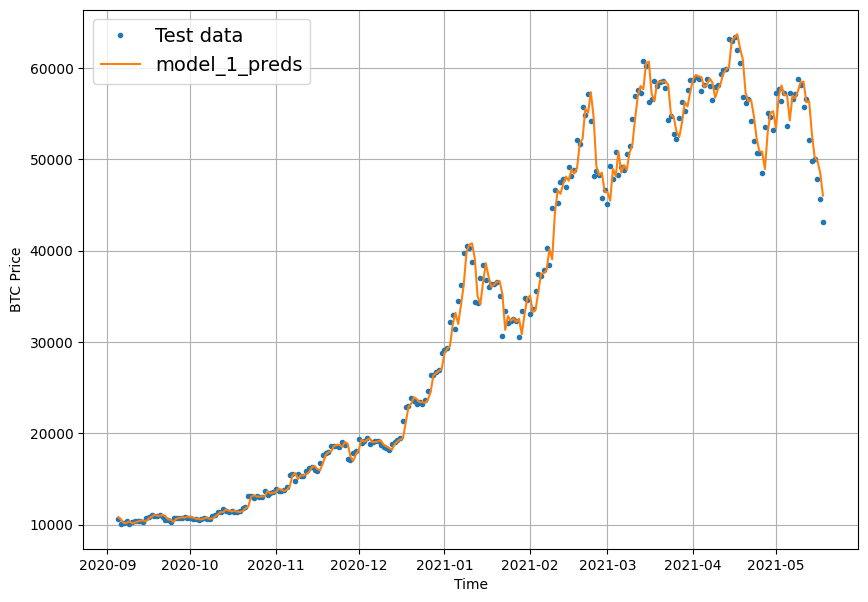

In [ ]:
# Plotting the model_1 predictions
offset = 300
plt.figure(figsize=(10, 7))

# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label = 'Test data')

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = '-',
                 label = "model_1_preds"
                 )

### Model 2: Dense (window = 30, horizon = 1)

In [ ]:
HORIZON = 1  # predict one step at a time (one day of BitCoin price)
WINDOW_SIZE = 30  # use 30 timesteps in past

In [ ]:
# Make windows data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices,
                                         window_size = WINDOW_SIZE,
                                         horizon = HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows = full_windows,
    labels = full_labels,
    test_split = 0.2
)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
train_windows[0], train_labels[0]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]),
 array([196.02499]))

In [ ]:
train_windows[0].shape, train_labels[0].shape

((30,), (1,))

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_2_dense')

# Compile the model
model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit the model
model_2_history = model_2.fit(x = train_windows,
                              y = train_labels,
                              epochs = 100,
                              batch_size = 128,
                              verbose = 1,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/100
18/18 [==============================] - 3s 77ms/step - loss: 979.1049 - mae: 979.1049 - mse: 3792994.7500 - val_loss: 3934.2109 - val_mae: 3934.2109 - val_mse: 34314248.0000
Epoch 2/100
18/18 [==============================] - 1s 38ms/step - loss: 391.7363 - mae: 391.7363 - mse: 666835.6250 - val_loss: 1699.5125 - val_mae: 1699.5125 - val_mse: 8300661.0000
Epoch 3/100
18/18 [==============================] - 1s 40ms/step - loss: 293.9648 - mae: 293.9648 - mse: 395319.1562 - val_loss: 1413.1602 - val_mae: 1413.1602 - val_mse: 6249069.5000
Epoch 4/100
18/18 [==============================] - 1s 36ms/step - loss: 235.4644 - mae: 235.4644 - mse: 272671.0312 - val_loss: 1268.3250 - val_mae: 1268.3250 - val_mse: 5298831.0000
Epoch 5/100
18/18 [==============================] - 1s 35ms/step - loss: 211.9695 - mae: 211.9695 - mse: 218334.5000 - val_loss: 1232.2507 - val_mae: 1232.2507 - val_mse: 4439253.0000
Epoch 6/100
18/18 [==============================] - 1s 37ms/step - loss:

In [ ]:
# Evaluate the model on the test set
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 648.7465 - mae: 648.7465 - mse: 1407838.1250


[648.7465209960938, 648.7465209960938, 1407838.125]

In [ ]:
# Load in the bests performing model
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 633.8983 - mae: 633.8983 - mse: 1377254.1250


[633.8982543945312, 633.8982543945312, 1377254.125]

In [ ]:
# Get the forecast predictions
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
test_labels.shape, model_2_preds.shape

((552, 1), TensorShape([552]))

In [ ]:
# Evaluate results of the model_2's predictions
model_2_results = evaluate_preds(y_true= tf.squeeze(test_labels),
                                 y_pred = model_2_preds)
model_2_results

{'mae': 633.89825,
 'mape': 2.8690119,
 'mase': 1.1080604,
 'mse': 1377254.0,
 'rmse': 1173.5646}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

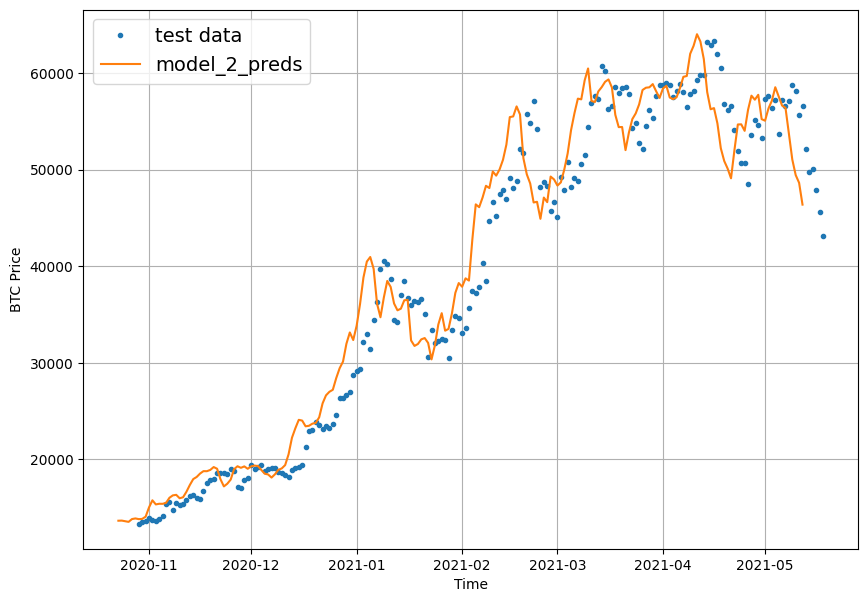

In [ ]:
offset = 350
plt.figure(figsize = (10, 7))

# Account for test_window offset when plotting
plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:, 0],
                 start = offset,
                 label = 'test data')

plot_time_series(timesteps = X_test[:len(test_windows):],
                 values = model_2_preds,
                 start = offset,
                 format = '-',
                 label = 'model_2_preds')

### Model 3: Dense (window = 10, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

In [ ]:
# Make windows data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices,
                                         window_size = WINDOW_SIZE,
                                         horizon = HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows = full_windows,
    labels = full_labels,
    test_split = 0.2
)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
train_windows[0], train_labels[0]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]),
 array([196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
        248.25333]))

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create model (same as model_1 but with different data input and sizes)
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_3_dense')

# Compile the model
model_3.compile(loss='mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit the model
model_3_history = model_3.fit(x = train_windows,
                              y = train_labels,
                              epochs = 100,
                              batch_size = 128,
                              verbose = 1,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/100
18/18 [==============================] - 2s 46ms/step - loss: 1462.3090 - mae: 1462.3090 - mse: 9389623.0000 - val_loss: 2661.5576 - val_mae: 2661.5576 - val_mse: 18262960.0000
Epoch 2/100
18/18 [==============================] - 1s 37ms/step - loss: 530.8510 - mae: 530.8510 - mse: 1226212.1250 - val_loss: 2637.3982 - val_mae: 2637.3982 - val_mse: 18639820.0000
Epoch 3/100
18/18 [==============================] - 1s 35ms/step - loss: 435.8828 - mae: 435.8828 - mse: 891514.3750 - val_loss: 2297.7087 - val_mae: 2297.7087 - val_mse: 15063593.0000
Epoch 4/100
18/18 [==============================] - 1s 38ms/step - loss: 400.0132 - mae: 400.0132 - mse: 774834.8750 - val_loss: 2090.1501 - val_mae: 2090.1501 - val_mse: 12776043.0000
Epoch 5/100
18/18 [==============================] - 1s 35ms/step - loss: 372.1036 - mae: 372.1036 - mse: 687315.5000 - val_loss: 2087.3560 - val_mae: 2087.3560 - val_mse: 12807918.0000
Epoch 6/100
18/18 [==============================] - 1s 37ms/step 

In [ ]:
# Evaluate the model on test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1360.8954 - mae: 1360.8954 - mse: 5937462.0000


[1360.8953857421875, 1360.8953857421875, 5937462.0]

Here, we can see that the metrics of this model, is much higher than the previous models.

This is because the further we predict into the future, the less accurate is the model.

Since, here the horizon is 7 (i.e. we are trying to predict the BitCoin price of the next 7 days), therefore the accuracy of the model is also very less.

In [ ]:
# Load the best version of the model_3
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1248.6730 - mae: 1248.6730 - mse: 5380992.0000


[1248.6729736328125, 1248.6729736328125, 5380992.0]

In [ ]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data = test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9507.55 , 9405.922, 9451.091, 9257.887, 9360.756, 9395.647,
        9249.33 ],
       [9147.628, 9037.145, 9162.288, 9040.112, 9020.837, 9193.91 ,
        9017.5  ],
       [8955.525, 8985.634, 9124.047, 8960.304, 9021.979, 8849.69 ,
        8946.752],
       [9132.474, 9192.113, 9112.707, 9030.676, 9227.068, 9044.698,
        9175.092],
       [9000.45 , 9013.51 , 8862.794, 8943.479, 9149.927, 9037.119,
        8835.137]], dtype=float32)>

In [ ]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

In [ ]:
test_windows.shape

(551, 30)

In [ ]:
tf.squeeze(test_labels).shape, tf.squeeze(model_3_preds).shape

(TensorShape([551, 7]), TensorShape([551, 7]))

In [ ]:
# Evaluate the model_3 results (these are multi-dimensional in nature)
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)

model_3_results

{'mae': array([ 582.2397  ,  349.81625 ,  309.3206  ,  504.09515 ,  423.14008 ,
         487.10107 ,  464.1282  ,  522.01306 ,  592.26263 ,  588.8788  ,
         850.46686 ,  777.86035 ,  754.5319  ,  902.0085  ,  645.5389  ,
         372.64127 ,  298.97266 ,  263.21408 ,  228.57722 ,  230.98158 ,
         173.12025 ,  161.26158 ,  314.42905 ,  347.01074 ,  221.68172 ,
         192.47119 ,  155.18059 ,   68.65667 ,  104.76458 ,  189.4781  ,
         300.5397  ,  370.6324  ,  355.70523 ,  354.43863 ,  278.14117 ,
         262.9438  ,  357.72202 ,  292.38568 ,  207.66183 ,  181.3969  ,
         413.2569  ,   97.16239 ,   79.77406 ,   60.729492,   70.90758 ,
         109.80029 ,  119.70619 ,  104.43115 ,  104.17571 ,  107.038155,
          39.135323,  117.116005,  231.52281 ,  220.36049 ,  288.30658 ,
         367.68478 ,  539.521   ,  497.2689  ,  560.89197 ,  579.43097 ,
         377.35825 ,  251.06201 ,  324.09033 ,  365.95752 ,  414.90152 ,
         496.1003  ,  545.88885 ,  489.9788 

### Making the evaluation function work for longer horizons

In [ ]:
model_3_results['mae'].shape, model_3_results['mae'].ndim

((551,), 1)

In [ ]:
model_2_results['mae'].shape, model_2_results['mae'].ndim

((), 0)

In [ ]:
tf.reduce_mean(model_3_results['mae']).numpy()

1248.673

In [ ]:
def evaluate_preds(y_true, y_pred):
  # data must in float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  # Calculate evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy()}

In [ ]:
# Get model_3 resultss aggregrated to single values
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1248.673,
 'mape': 5.620928,
 'mase': 2.2219439,
 'mse': 5380992.0,
 'rmse': 1433.55}

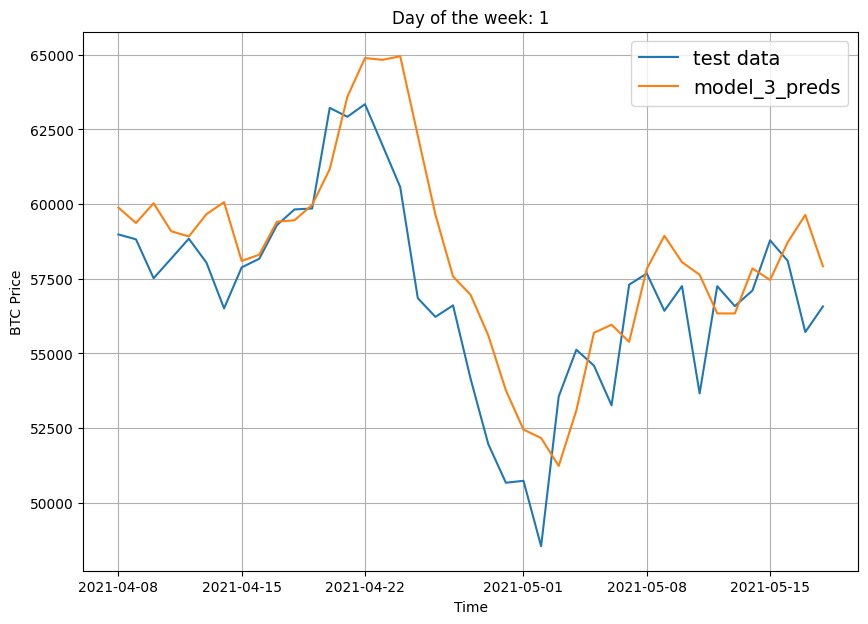

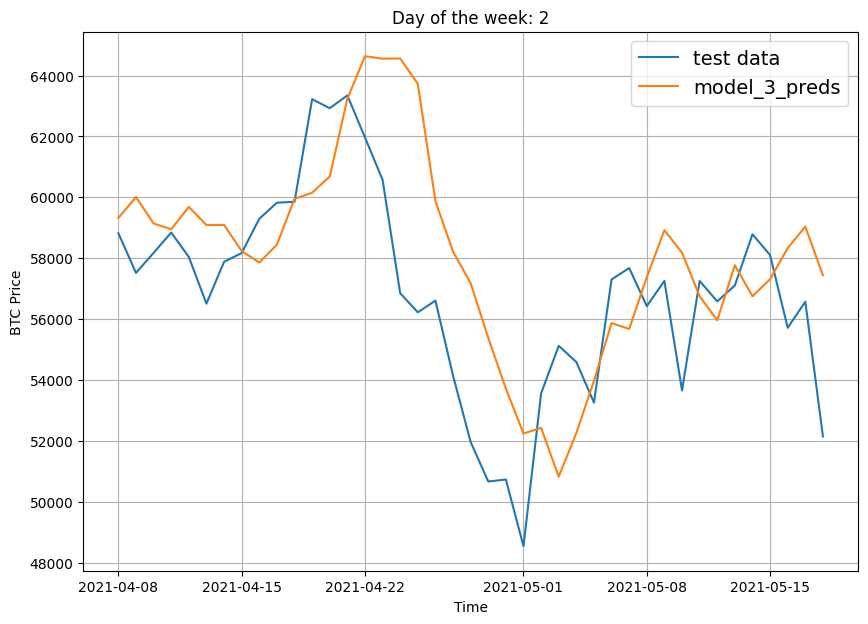

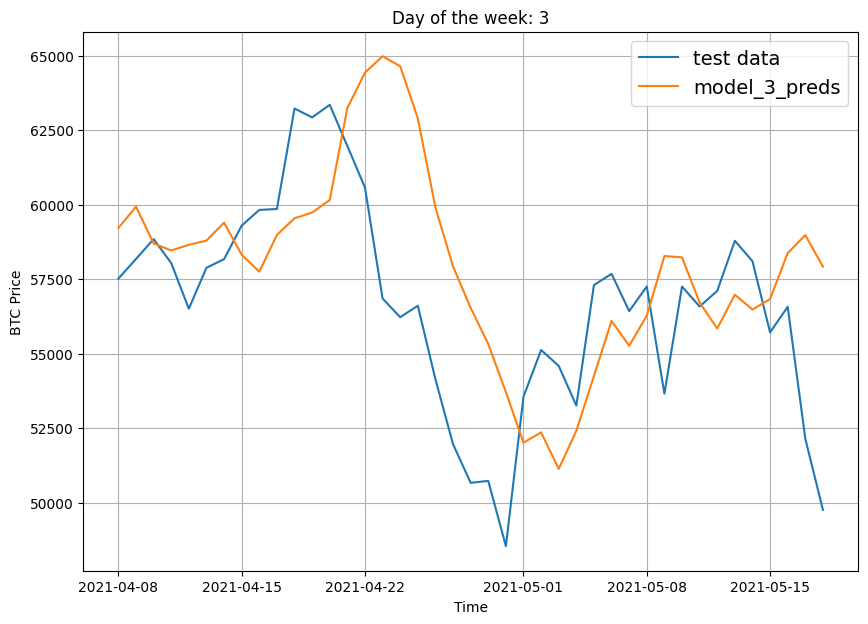

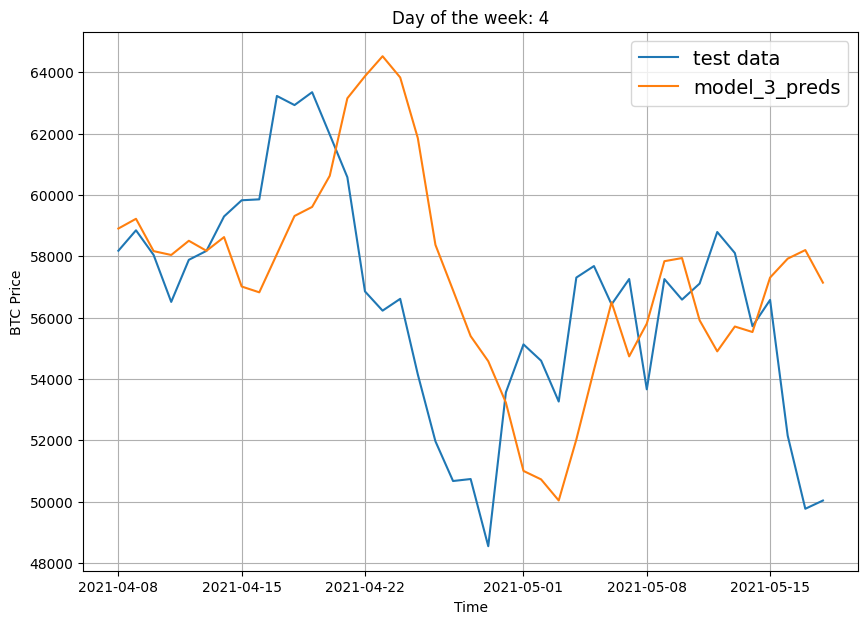

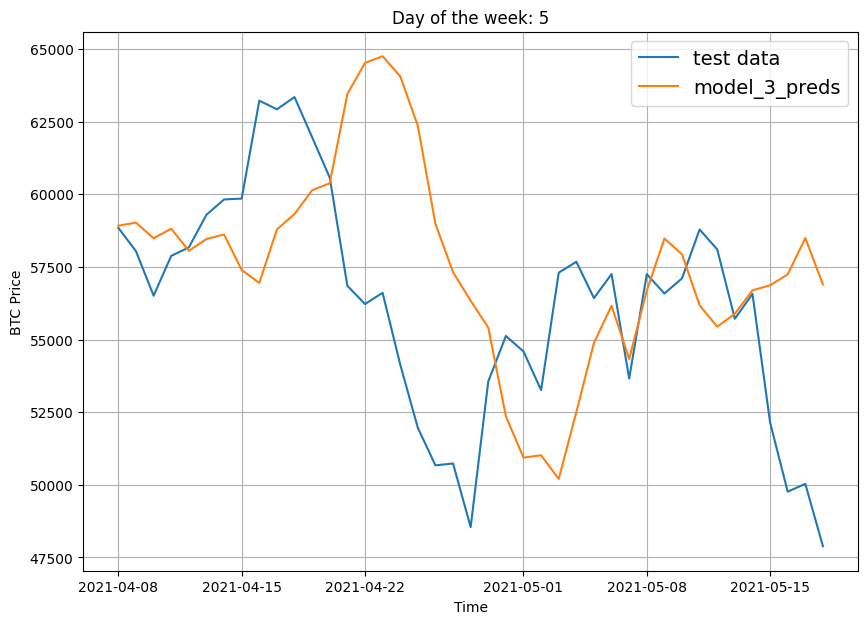

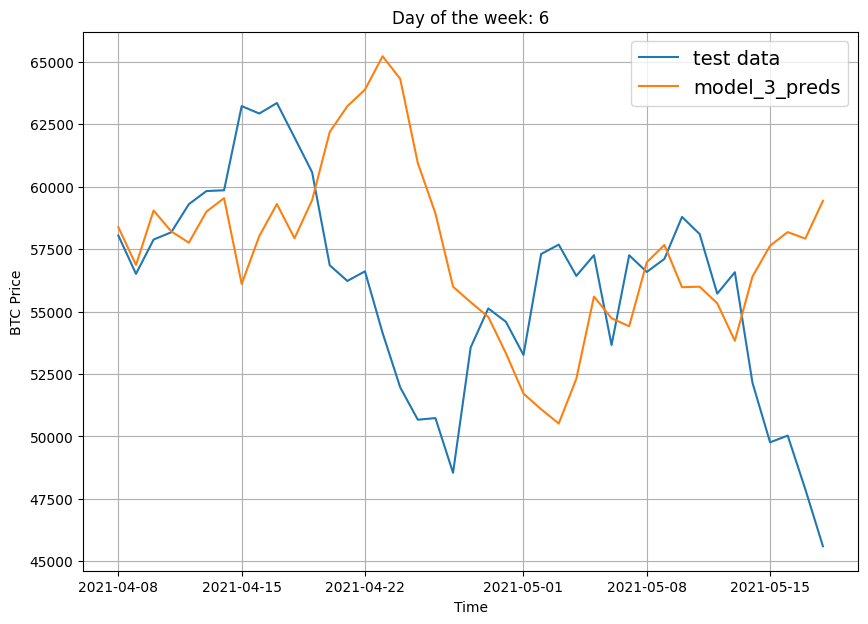

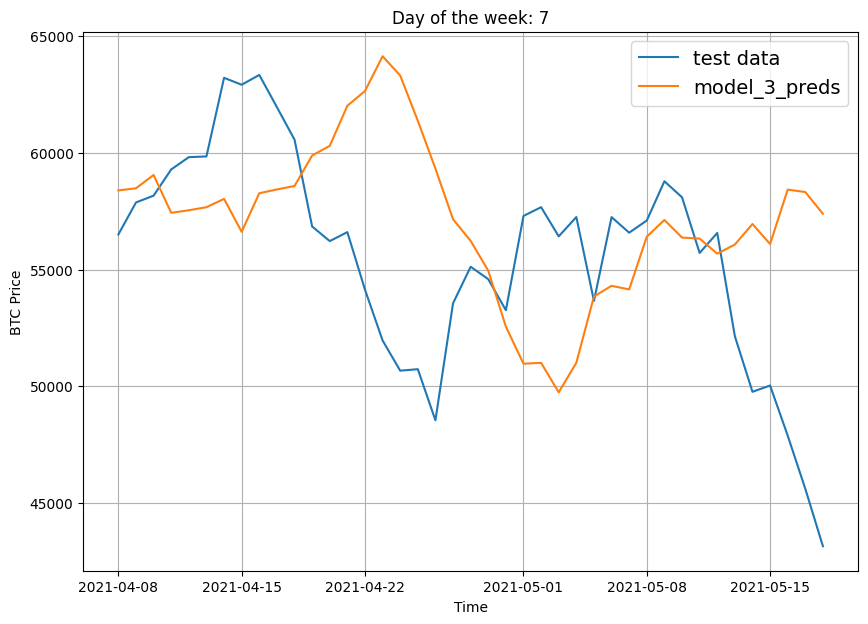

In [ ]:
# Plotting the model's predictions
offset = 510

# Get plots for the whole week
for day_num in range(7):
  plt.figure(figsize=(10, 7))
  plt.title(f'Day of the week: {day_num + 1}')
  plot_time_series(timesteps = X_test[-len(test_windows):],
                  values = test_labels[:, day_num],
                  start = offset,
                  format = '-',
                  label = 'test data')

  plot_time_series(timesteps = X_test[-len(test_windows):],
                  values = model_3_preds[:, day_num],
                  format = '-',
                  start = offset,
                  label = 'model_3_preds')
  plt.show();

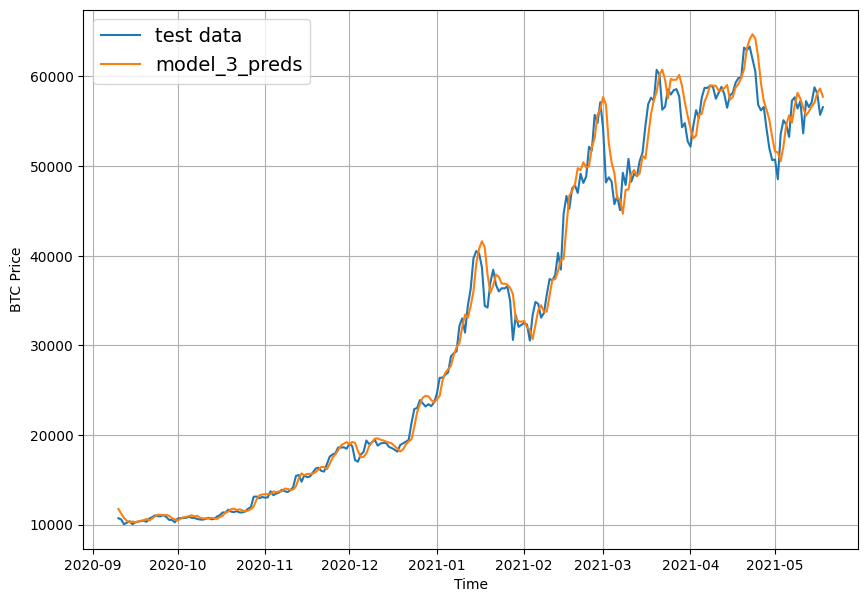

In [ ]:
# Reduce the data to their means and plot again
# Plotting the model's predictions
offset = 300

plt.figure(figsize=(10, 7))
plot_time_series(timesteps = X_test[-len(test_windows):],
                  values = test_labels[:, 0],
                  start = offset,
                  format = '-',
                  label = 'test data')

plot_time_series(timesteps = X_test[-len(test_windows):],
                  values = tf.reduce_mean(model_3_preds, axis=1),
                  format = '-',
                  start = offset,
                  label = 'model_3_preds')

### Comparing the models created so far

<Axes: >

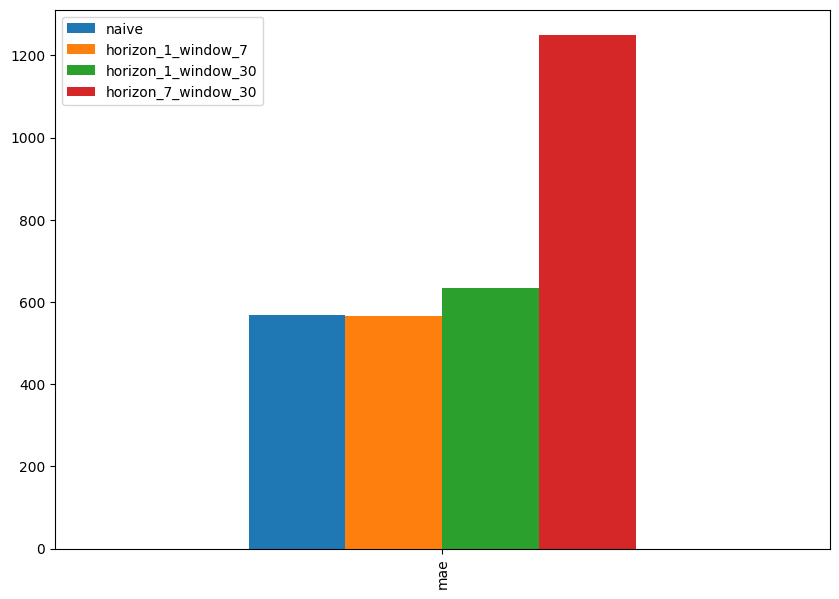

In [ ]:
pd.DataFrame({'naive': naive_results['mae'],
              'horizon_1_window_7': model_1_results['mae'],
              'horizon_1_window_30': model_2_results['mae'],
              'horizon_7_window_30': model_3_results['mae']},
              index = ['mae']
              ).plot(figsize = (10, 7),
                      kind = 'bar')

### Model 4: Conv1D

In [ ]:
HORIZON = 1  # Predict next day of BitCoin prices
WINDOW_SIZE = 7  # use previous week worth of data

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices,
                                         window_size = WINDOW_SIZE,
                                         horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Create train / test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows = full_windows,
    labels = full_labels,
    test_split = 0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

To use the Conv1D layer, we need input shape of: `(batch, timesteps, input_dim)`

Therefore, changing the data into appropriate shape.

In [ ]:
# Checking shape of data
train_windows[0].shape

(7,)

In [ ]:
# Before passing the data to the Conv1D layer, we need to reshape it
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))  ## add an extra dimension to input dim

In [ ]:
# Testing out the lambda layer
print(f"Original shape: {x.shape}")  # (window_size)
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"original values with expanded shape: \n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
original values with expanded shape: 
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
# Setting random seed
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters = 128, kernel_size = 7, padding = 'causal', strides=1, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_4_conv1d')

# Compile the model
model_4.compile(loss='mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit the model
model_4_history = model_4.fit(train_windows,
                              train_labels,
                              batch_size = 128,
                              epochs = 100,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name = model_4.name)])

Epoch 1/100
18/18 [==============================] - 8s 92ms/step - loss: 1542.1648 - mae: 1542.1648 - mse: 7467730.5000 - val_loss: 999.4734 - val_mae: 999.4734 - val_mse: 3384513.7500
Epoch 2/100
18/18 [==============================] - 0s 16ms/step - loss: 320.4008 - mae: 320.4008 - mse: 409648.2188 - val_loss: 1621.4440 - val_mae: 1621.4440 - val_mse: 6300180.0000
Epoch 3/100
18/18 [==============================] - 0s 11ms/step - loss: 216.0485 - mae: 216.0485 - mse: 223521.0469 - val_loss: 1025.7103 - val_mae: 1025.7103 - val_mse: 3283747.7500
Epoch 4/100
18/18 [==============================] - 1s 49ms/step - loss: 182.9109 - mae: 182.9109 - mse: 169550.0312 - val_loss: 972.3691 - val_mae: 972.3691 - val_mse: 3194624.5000
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 175.0573 - mae: 175.0573 - mse: 162285.0469 - val_loss: 973.1385 - val_mae: 973.1385 - val_mse: 3085111.2500
Epoch 6/100
18/18 [==============================] - 1s 46ms/step - loss: 171.0

In [ ]:
# Model 4 summary
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6529 (25.50 KB)
Trainable params: 6529 (25.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate the model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 617.8883 - mae: 617.8883 - mse: 1268048.6250


[617.8883056640625, 617.8883056640625, 1268048.625]

In [ ]:
# Load the best model
model_4 = tf.keras.models.load_model('model_experiments/model_4_conv1d')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 573.6948 - mae: 573.6948 - mse: 1195146.3750


[573.69482421875, 573.69482421875, 1195146.375]

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8903.224, 8783.125, 8989.824, 8787.179, 8735.572, 8746.874,
       8680.274, 8532.408, 8465.142, 8513.288], dtype=float32)>

In [ ]:
# Evaluate the performance
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                  y_pred = model_4_preds)
model_4_results

{'mae': 573.6948,
 'mape': 2.5701323,
 'mase': 1.0078229,
 'mse': 1195146.5,
 'rmse': 1093.2275}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
model_1_results

{'mae': 564.8935,
 'mape': 2.5278218,
 'mase': 0.9923614,
 'mse': 1160544.6,
 'rmse': 1077.2858}

### Model 5: RNN (LSTM)

Here, we'll use the same data made with horizon = 1 and window_size = 7.

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create the lstm model with the functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
x = layers.LSTM(128, return_sequences = True, activation='relu')(x)
x = layers.LSTM(128, activation = 'relu')(x)
x = layers.Dense(32, activation = 'relu')(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'model_5_lstm')

# Compile the model
model_5.compile(loss='mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit the model
model_5_history = model_5.fit(train_windows,
                              train_labels,
                              batch_size = 128,
                              epochs = 100,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name = model_5.name)]
                              )

Epoch 1/100
18/18 [==============================] - 10s 219ms/step - loss: 3029.3821 - mae: 3029.3821 - mse: 22242324.0000 - val_loss: 17567.4512 - val_mae: 17567.4512 - val_mse: 543299392.0000
Epoch 2/100
18/18 [==============================] - 3s 188ms/step - loss: 1881.7684 - mae: 1881.7684 - mse: 9704033.0000 - val_loss: 1574.4396 - val_mae: 1574.4396 - val_mse: 6143845.5000
Epoch 3/100
18/18 [==============================] - 0s 13ms/step - loss: 362.4507 - mae: 362.4507 - mse: 492457.3750 - val_loss: 1691.7616 - val_mae: 1691.7616 - val_mse: 6907986.5000
Epoch 4/100
18/18 [==============================] - 3s 204ms/step - loss: 202.7421 - mae: 202.7421 - mse: 204444.3438 - val_loss: 1032.0443 - val_mae: 1032.0443 - val_mse: 3438460.2500
Epoch 5/100
18/18 [==============================] - 4s 209ms/step - loss: 180.6226 - mae: 180.6226 - mse: 171850.3125 - val_loss: 991.2600 - val_mae: 991.2600 - val_mse: 3280932.5000
Epoch 6/100
18/18 [==============================] - 0s 24ms/

In [ ]:
# model summary
model_5.summary()

Model: "model_5_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 1, 128)            69632     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 205377 (802.25 KB)
Trainable params: 205

In [ ]:
# Evaluate the model
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 577.5174 - mae: 577.5174 - mse: 1188400.7500


[577.5173950195312, 577.5173950195312, 1188400.75]

In [ ]:
# Load in the best version of the model_5
model_5 = tf.keras.models.load_model('model_experiments/model_5_lstm')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 573.2665 - mae: 573.2665 - mse: 1183227.8750


[573.2665405273438, 573.2665405273438, 1183227.875]

In [ ]:
# Make prediction using the model
model_5_preds = make_preds(model_4, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8903.224, 8783.125, 8989.824, 8787.179, 8735.572], dtype=float32)>

In [ ]:
# Evaluate the model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred = model_5_preds)
model_5_results

{'mae': 573.6948,
 'mape': 2.5701323,
 'mase': 1.0078229,
 'mse': 1195146.5,
 'rmse': 1093.2275}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

### Making a multivariate time-series dataset

What kind of feature can be added for the multivariate data.

One feature that can be added is whether or not a famous person tweeted on BitCoin on that day.

Better feature - BitCoin halving.        
While mining for bitcoins, the miners take up, what you call is a `BLOCK`. This consists of the mined bitcoin, in simple words.

As the block is taken by some miners, the chance of securing a block space decreases.

What happens in BitCoin halving is that, as the block free space is halved, the price of the Bitcoin is expected to shot up, due to lower availability of such blocks spaces.

Therefore, this can be a good feature that can be used for the multivariate time-series model

In [ ]:
# Making a multivariate time series
bitcoin_prices[:10]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866
2013-10-06,120.65533
2013-10-07,121.79500
2013-10-08,123.03300
2013-10-09,124.04900


In [ ]:
# Adding the bitcoin halving events
# Our time series data starts from 1st October, 2009
block_reward_1 = 50   # 3 January 2009 - this is not present in our data
block_reward_2 = 25   # 8 November 2012
block_reward_3 = 12.5  # 9th July, 2016
block_reward_4 = 6.25  # 18th May, 2020

# Block reward dates
block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

In [ ]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [ ]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days, len(bitcoin_prices)

(1012, 2421, 2787)

In [ ]:
# Add in a block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# Add in the block_reward values as feature
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days: block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

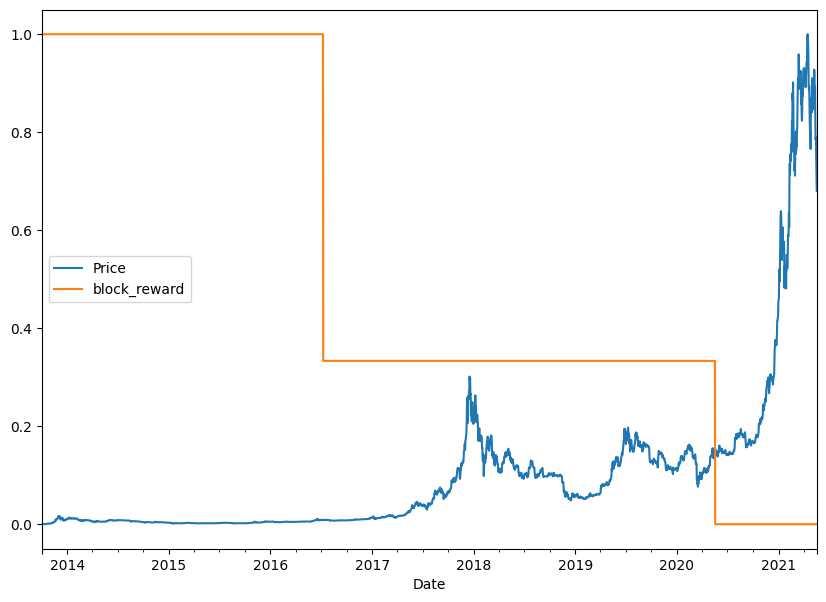

In [ ]:
# plot the block_reward Vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7))

### Making a windowed dataset with the multivariate data

Here, we will use the pandas.DataFrame.shift() methdod to window the multivariate data.

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of BitCoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):  # Shift values for each step in WINDOW_SIZE
   bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


Here, we have created a way to window the dataset directly from the pandas dataframe

In [ ]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Making train and test sets
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

### Model 6: Dense (multivariate time-series data)

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_6_dense_multi')

# Compile the model
model_6.compile(loss='mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit the model
model_6_history = model_6.fit(X_train, y_train,
                              epochs = 100,
                              batch_size = 128,
                              validation_data = (X_test, y_test),
                              callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/100
18/18 [==============================] - 2s 79ms/step - loss: 896.7896 - mae: 896.7896 - mse: 3369255.0000 - val_loss: 1313.1095 - val_mae: 1313.1095 - val_mse: 4983196.0000
Epoch 2/100
18/18 [==============================] - 1s 45ms/step - loss: 262.7266 - mae: 262.7266 - mse: 288159.0000 - val_loss: 1183.2963 - val_mae: 1183.2963 - val_mse: 4364311.0000
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 211.9936 - mae: 211.9936 - mse: 229274.2344 - val_loss: 1276.1925 - val_mae: 1276.1925 - val_mse: 4451651.0000
Epoch 4/100
18/18 [==============================] - 1s 48ms/step - loss: 189.4457 - mae: 189.4457 - mse: 185695.1562 - val_loss: 1044.6797 - val_mae: 1044.6796 - val_mse: 3269502.2500
Epoch 5/100
18/18 [==============================] - 1s 49ms/step - loss: 169.0211 - mae: 169.0211 - mse: 151864.7812 - val_loss: 938.1489 - val_mae: 938.1489 - val_mse: 2910725.0000
Epoch 6/100
18/18 [==============================] - 1s 40ms/step - loss: 155

In [ ]:
# Evaluate the model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 570.8975 - mae: 570.8975 - mse: 1166809.2500


[570.8974609375, 570.8974609375, 1166809.25]

In [ ]:
# Load in the best model
model_6 = tf.keras.models.load_model('model_experiments/model_6_dense_multi')
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 5ms/step - loss: 568.8543 - mae: 568.8543 - mse: 1159616.2500


[568.8543090820312, 568.8543090820312, 1159616.25]

In [ ]:
# Make predictions using the model 6
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8812.502, 8756.538, 9003.09 , 8754.334, 8710.117, 8677.817,
       8657.043, 8500.913, 8413.365, 8501.063], dtype=float32)>

In [ ]:
# Evaluate model on its predictions
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_6_preds)
model_6_results

{'mae': 568.8543,
 'mape': 2.5725915,
 'mase': 0.99931943,
 'mse': 1159616.2,
 'rmse': 1076.8549}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

### Model 7: N-BEATS

This will be the biggest time-series model we will be building so far.

#### Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in Tensorflow, we need to create it.
This will be done using sub-classing.

In [ ]:
# Create N-BEAT Block custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs takes care of all other arguement, like trainable, etc
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    # self.hidden is a list contained n fully connnected layers
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]

    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Testing the NBeatsBlock Class, by making dummy inputs and outputs.

In [ ]:
tf.random.set_seed(42)

# Setup dummy NBeatsBlock layer to dummy inputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon = HORIZON,
                                       n_neurons = 128,
                                       n_layers = 4
                                       )

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)  # input shape to the model has to reflect dense layer input
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)

print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.03484523 -0.35657972 -0.04130277 -0.31093577  0.54241925  0.1395349
 -0.33792827]
Forecast: -0.5390391945838928


#### Preparing data for the N-BEATS algorithm using `tf.data`

To make the input data load as fast as possible, we need to make a performant data pipeline using tf.data

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create N-BEATS data inputs
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)

bitcoin_prices_nbeats.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make train and test sets
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
# Making the dataset performant using the tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch the dataset
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

#### Setting up hyperparamters for N-BEATS algorithm

In [ ]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE *  HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

#### Creating the residual connections of the N-BEATS algorithm

The N-BEATS algorithm uses double residual stacking to help train its model.

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


#### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this will be the initial block used for network, rest of the architecture will be present in stacks)                     
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecast for the model with the layer created in (1)
4. Use for loops to create stacks of block layer
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss and Adam optimizer with default settings
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll be using a couple of callbacks:
  * Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)

In [ ]:
%%time

# set the random seed
tf.random.set_seed(42)

# 1. Setup an instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name = 'InitialBlock')

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name = 'stack_input')

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)):  # First stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast and the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f"NBeatsBlock_{i}"
  )(residuals)   # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f'subtract_{i}')
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs = stack_input,
                         outputs = forecast,
                         name = 'model_7_nbeats')

# 8. Compile the model
model_7.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7_history = model_7.fit(train_dataset,
                              epochs = N_EPOCHS,
                              validation_data = test_dataset,
                              verbose = 0,
                              callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                            patience=200,
                                                                            restore_best_weights=True),
                                           tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                                patience=100,
                                                                                verbose = 1)]
                              )


Epoch 787: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1153: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1253: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 5min, sys: 6.45 s, total: 5min 6s
Wall time: 5min 45s


In [ ]:
# Get summary of the model
model_7.summary()

Model: "model_7_nbeats"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 stack_input (InputLayer)    [(None, 7)]                  0         []                            
                                                                                                  
 InitialBlock (NBeatsBlock)  ((None, 7),                  796168    ['stack_input[0][0]']         
                              (None, 1))                                                          
                                                                                                  
 NBeatsBlock_0 (NBeatsBlock  ((None, 7),                  796168    ['InitialBlock[0][0]']        
 )                            (None, 1))                                                          
                                                                                     

In [ ]:
# Evaluate the model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 40ms/step - loss: 569.1996


569.1996459960938

In [ ]:
# Make predictions using the N-BEATS model
model_7_preds = tf.squeeze(model_7.predict(test_dataset))
model_7_preds[:10]

1/1 [==============================] - 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8827.483, 8785.526, 9054.552, 8756.433, 8759.151, 8758.746,
       8663.212, 8511.474, 8478.101, 8529.885], dtype=float32)>

In [ ]:
# Evaluate the model's predictions
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)
model_7_results

{'mae': 569.19965,
 'mape': 2.6103544,
 'mase': 0.99992615,
 'mse': 1165779.6,
 'rmse': 1079.7128}

In [ ]:
model_1_results

{'mae': 564.8935,
 'mape': 2.5278218,
 'mase': 0.9923614,
 'mse': 1160544.6,
 'rmse': 1077.2858}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

#### Plotting the N-BEATS architecture we've created

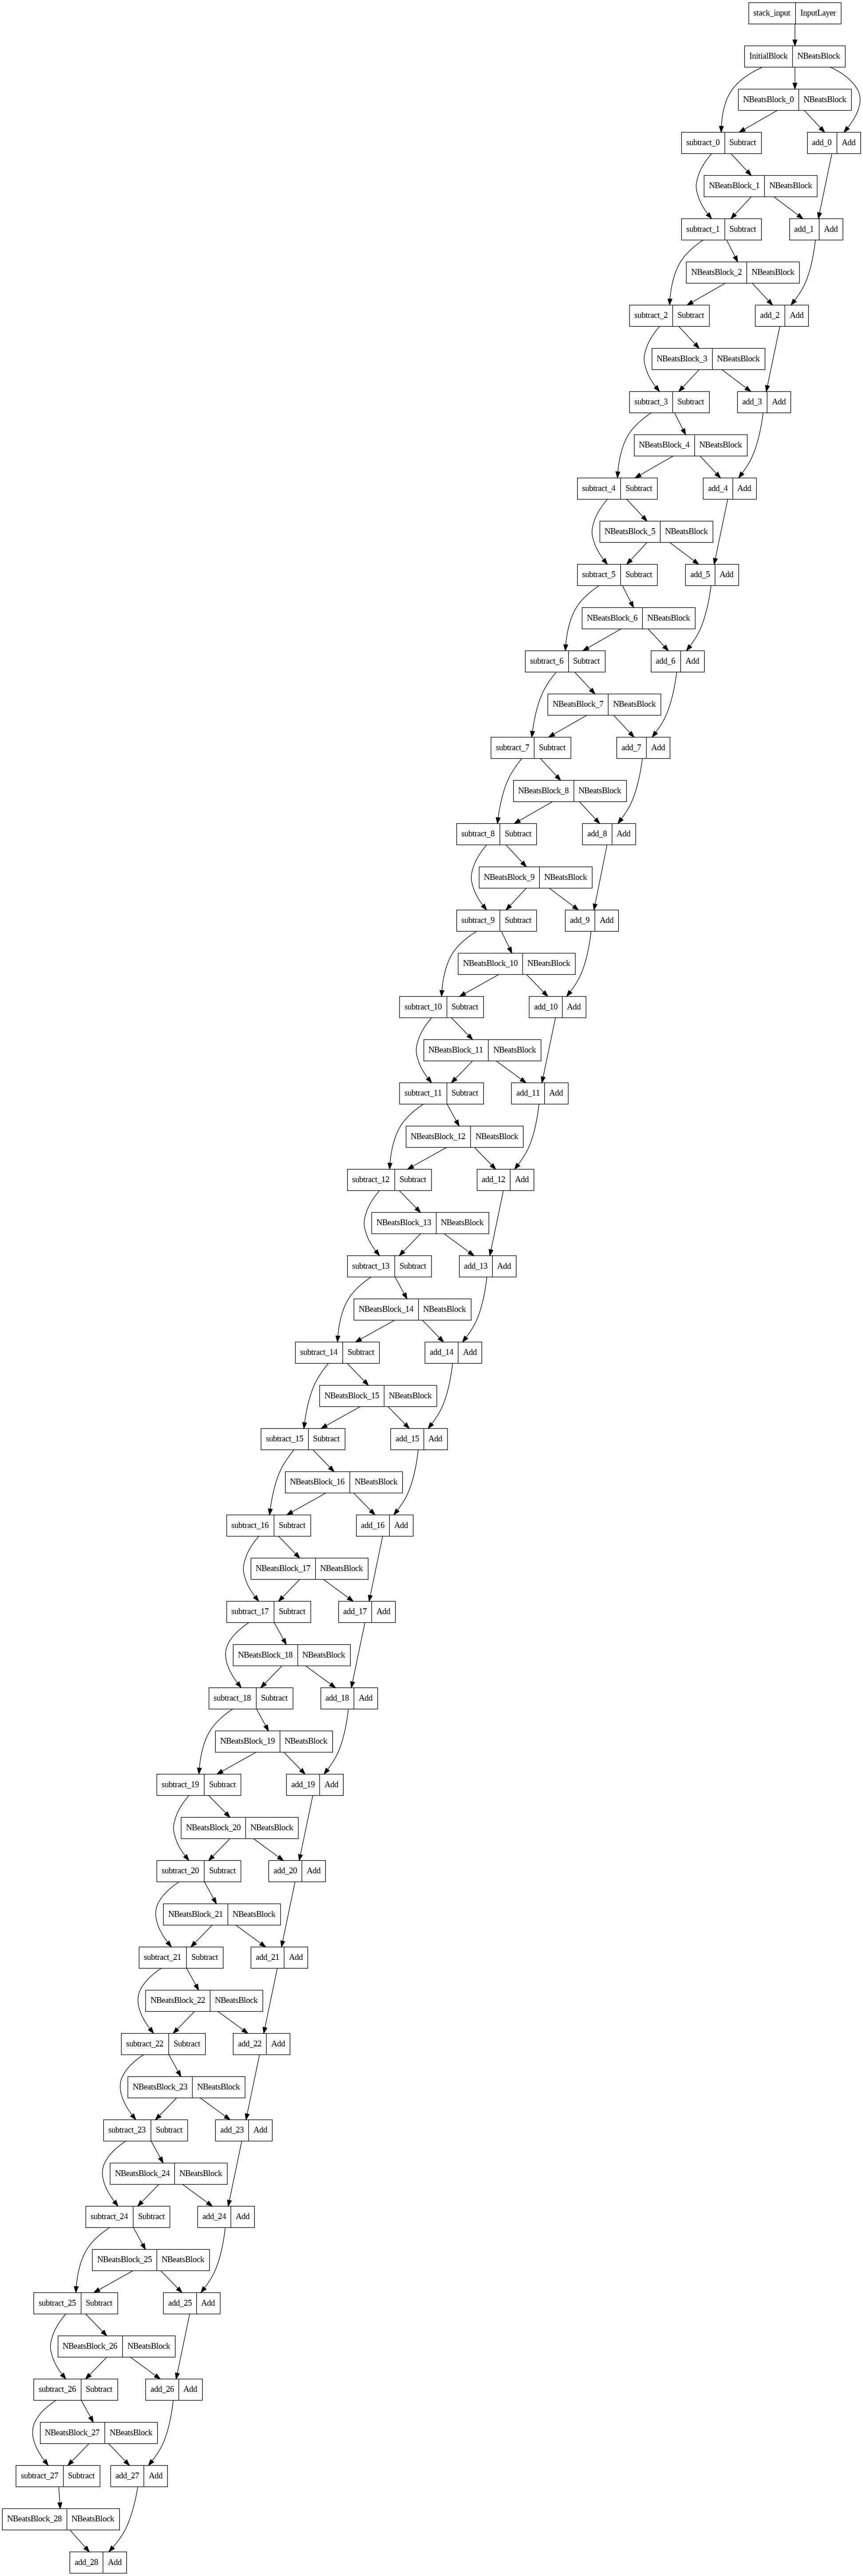

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

### Model 8: Ensemble model (stacking different models together)

An emsemble leverages the idea of the crowd effect.

It combines many different models to predict a common goal

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

#### Constructing and fitting an ensemble of models (many different models using different loss functions)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter = 10,   # how many models do we want to train?
                        num_epochs = 1000,  # how many epochs do we want to train each model for?
                        loss_fn = ['mae', 'mse', 'mape']):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter = 10, then a list of 30 trained models will be returned:
  10 * len(['mae', 'mse', 'mape'])
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fn:
      print(f"Optimizing model by reducing : {loss_function} for {num_epochs} epochs, model number: {i}\n\n")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer = "he_normal",activation='relu'),
          layers.Dense(128, kernel_initializer = "he_normal",activation='relu'),
          layers.Dense(HORIZON),
      ])

      # Compile the model
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics = ['mae', 'mse'])

      # Fit the model
      model.fit(train_dataset,
                epochs = num_epochs,
                verbose = 0,
                validation_data = test_data,
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              patience = 200,
                                                              restore_best_weights=True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                  patience = 100,
                                                                  verbose = 1
                                                                  )]
                )

      # append the model to the list
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time

# Get list of trained ensemble models
ensemble_models = get_ensemble_models()

Optimizing model by reducing : mae for 1000 epochs, model number: 0



Epoch 820: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 959: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing : mse for 1000 epochs, model number: 0



Epoch 450: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 550: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing : mape for 1000 epochs, model number: 0



Epoch 147: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 247: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing : mae for 1000 epochs, model number: 1



Epoch 359: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing : mse for 1000 epochs, model number: 1



Epoch 287: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 38

In [ ]:
len(ensemble_models)

30

In [ ]:
ensemble_models

#### Make predictions using the ensemble model

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 40ms/step
CPU times: user 1.47 s, sys: 60.1 ms, total: 1.53 s
Wall time: 1.77 s


<tf.Tensor: shape=(30, 556), dtype=float32, numpy=
array([[ 8815.67 ,  8732.137,  9079.215, ..., 49503.188, 49342.195,
        46528.055],
       [ 8734.185,  8793.051,  9087.976, ..., 50538.387, 48243.883,
        45727.332],
       [ 8831.734,  8785.437,  9084.004, ..., 49955.96 , 48536.914,
        46376.08 ],
       ...,
       [ 8802.945,  8749.508,  9026.96 , ..., 50086.83 , 48592.203,
        46108.258],
       [ 8767.024,  8774.69 ,  9026.949, ..., 49603.316, 48550.84 ,
        46006.45 ],
       [ 8830.663,  8811.315,  9088.255, ..., 49646.008, 47900.484,
        46011.656]], dtype=float32)>

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8790.759, 8773.384, 9061.412, 8712.716, 8747.801, 8727.113,
       8647.448, 8486.115, 8456.996, 8518.603], dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds, axis = 0)
ensemble_median[:10]

array([8794.022, 8779.178, 9057.758, 8713.209, 8751.895, 8725.178,
       8645.064, 8488.596, 8457.752, 8521.303], dtype=float32)

In [ ]:
# Evaluate ensemble model predictions (on mean of predictions)
ensemble_results_mean = evaluate_preds(y_true = y_test,
                                       y_pred = ensemble_mean)
ensemble_results_mean

{'mae': 567.4668,
 'mape': 2.5699484,
 'mase': 0.99688196,
 'mse': 1142082.1,
 'rmse': 1068.6824}

In [ ]:
# Evaluate ensemble model predictions (on median of predictions)
ensemble_results_median = evaluate_preds(y_true = y_test,
                                       y_pred = ensemble_median)
ensemble_results_median

{'mae': 568.70087,
 'mape': 2.5701425,
 'mase': 0.9990499,
 'mse': 1145767.9,
 'rmse': 1070.4055}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
model_1_results

{'mae': 564.8935,
 'mape': 2.5278218,
 'mase': 0.9923614,
 'mse': 1160544.6,
 'rmse': 1077.2858}

### Plotting the prediction intervals (uncertainity estimates) of the ensemble

So far, we have been making point predictions with the models.

E.g. horizon = 1, our model predicts tomorrow's price of BitCoin, i.e. just one value prediction of next data

How about getting the range of price from where the predictions come from?

One way to get the 95% confidence prediction intervals for deep learning model is the bootstrap method:                            
1) Take the predictions from a number of randomnly initiated models                   
2) Measure the standard deivation of the predictions                                  
3) Multiply the standard deviation by 1.96 (assuming the distribution of data is Gaussian or Normal in nature, 95% of observations fall within 1.96 standard deviations of the mean)                      
4) To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean / median of the predictions made in (1).

In [ ]:
tf.math.reduce_std(ensemble_preds, axis=0)

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 30.767956,  31.842642,  38.232746,  36.423195,  44.54886 ,
        43.52863 ,  24.796572,  29.581388,  36.95414 ,  17.938158,
        23.562792,  30.655869,  33.60656 ,  39.11836 ,  46.789032,
        39.396046,  48.61897 ,  49.05428 ,  50.91622 ,  43.93218 ,
        34.131657,  39.377644,  41.439533,  35.673946,  31.130342,
        25.009132,  22.743025,  30.690887,  21.975668,  21.138435,
        22.283455,  24.917719,  26.098116,  18.208668,  16.06539 ,
        21.434114,  24.585194,  17.877502,  23.989044,  25.147795,
        58.73933 ,  50.213802,  53.7808  ,  51.67418 ,  48.696762,
        49.399246,  22.277308,  16.56053 ,  14.005167,  14.327387,
        19.562378,  19.099323,  20.86834 ,  20.744623,  18.863441,
        15.073482,  29.478123,  29.21365 ,  26.888247,  33.357624,
        44.075314,  45.881767,  36.915478,  33.77529 ,  37.125134,
        31.552088,  25.306187,  43.79914 ,  51.54367 ,  43.761803,
        36.926

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds):
  # 1. Take predictions from a number of randomnly initialized models


  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deivation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction intervals upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [ ]:
# Get the lower and upper bounds of the 95% predictions interval
lower, upper = get_upper_lower(ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8730.453 ,  8710.973 ,  8986.476 ,  8641.326 ,  8660.485 ,
         8641.797 ,  8598.847 ,  8428.136 ,  8384.566 ,  8483.443 ,
         8153.9126,  8044.5625,  7991.803 ,  7540.4663,  7192.159 ,
         7235.3784,  6979.9883,  7112.2563,  7024.967 ,  7418.529 ,
         7336.146 ,  7653.707 ,  7501.7026,  7319.4316,  7267.3765,
         7259.759 ,  7152.4014,  7325.368 ,  7463.682 ,  7493.337 ,
         7510.656 ,  7292.114 ,  7179.26  ,  7146.3975,  7144.2754,
         7185.938 ,  7034.6777,  7062.979 ,  6826.7944,  6531.82  ,
         7275.594 ,  7074.2095,  7042.399 ,  7176.839 ,  7163.0605,
         7096.161 ,  7176.432 ,  7177.2544,  7146.722 ,  7189.0938,
         7267.7656,  7349.906 ,  7210.416 ,  7131.706 ,  7126.4653,
         6916.0986,  7211.046 ,  7280.2886,  7294.5537,  7659.4785,
         7987.81  ,  8049.999 ,  7783.1167,  8020.8345,  8042.285 ,
         8097.9487,  8065.901 ,  8657.097 ,  8813.265 ,  8676.8955,

In [ ]:
lower.shape, upper.shape

(TensorShape([556]), TensorShape([556]))

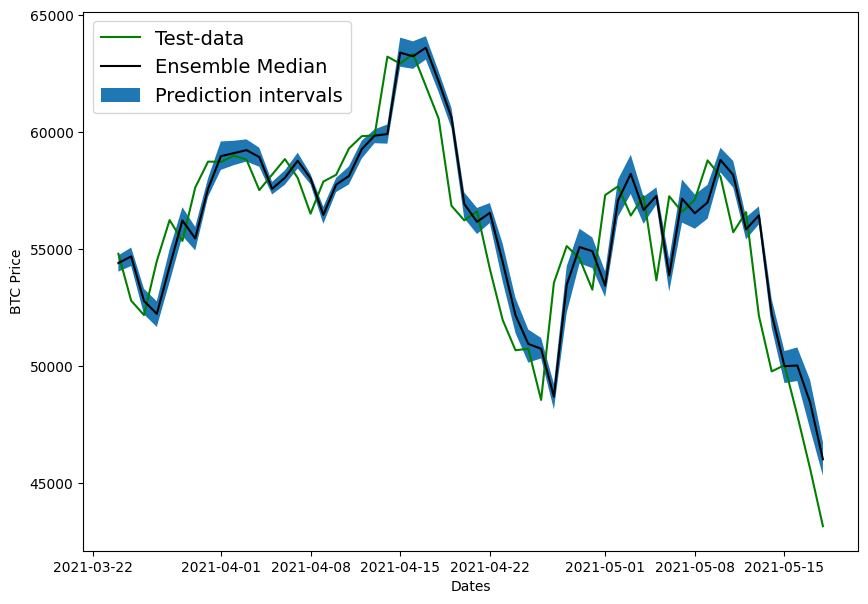

In [ ]:
# Get the median / mean values of the ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of the ensemble preds along with the prediction intervals (where the predictions fall between)
offset = 500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], 'g', label='Test-data')
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'k-', label='Ensemble Median')
plt.xlabel('Dates')
plt.ylabel('BTC Price')

# To plot the upper and lower bounds, use plt.fill_between
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label = 'Prediction intervals')
plt.legend(loc='upper left',fontsize = 14);

So far, as we have seen, the predictions we have made are lagging behind the test data, even though the results are kind of similar.

They are as if they're replicating what the naive model does, and try to predict its previous timestep

### Uncertainity types (coconut and subway)

Uncertainity estimates in machine learning seek out to qualitatively and quantitatively answer the questions:                        
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it be helpful if the model could tell that when it's making a prediction, it doesn't actually know if it's right or not)

There are 2 major types of uncertainity in machine learning:                        
* **Aleatoric uncertainity** - this type of uncertainity cannot be reduced and it is oftern referred as "data" uncertainity or "subway" uncertainity
* **Epistemic uncertainity** - this type of uncertainity can be reduced, it is also referred to as "model" or "coconut" uncertainity

### Model 9: Train a model on the full historical data to make predictions into the future

So far, all the models have predicted on the test dataset, however, this is only a pseudo-future.

Now, making a model, that is capable of predicting into the future.

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
len(bitcoin_prices_windowed)

2787

In [ ]:
# Train model on entire data to make predictions for the next data
X_all = bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward'], axis=1).to_numpy()

# Get all the labels
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [ ]:
X_all[:10], y_all[:10]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866],
        [125.9275 , 125.27966, 125.96116, 124.049  , 123.033  , 121.795  ,
         120.65533],
        [126.38333, 125.9275 , 125.27966, 125.96116, 124.049  , 123.033  ,
         121.795  ],
        [135.24199, 126.38333, 125.9275 , 125.27966, 125.96116, 124.049  ,
         123.033  ],
        [133.20333, 135.24199, 126.38333, 125.9275 , 125.27966, 125.96116,
         124.049  ],
        [142.76333, 133.20333, 135.24199, 126.38333, 125.9275 , 125.27966,
         125.96116]]),
 array([123.033  , 124.049  , 125.9611

#### Turn data into efficient running tensors

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch the data
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

#### Building the model_9

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create model (simple one)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name = 'model_9')

# Compile the model
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_9.fit(dataset_all,
            epochs = 100,
            verbose = 0)

#### Make predictions into the future

Here, what we will do is that:               
1) First, we predict price for the next day using the model                              
2) Append that forecast into the time-series dataset                                      3) Retrain the model and again predict for the next day. Add the prediction to the dataset as well.                             
4) Keep on doing steps 1 - 3, till we get appropriate amount of forecasts into the future.

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 50

To make predictions into the future, we want a function which:

1. Takes as input:
   * a list of values (BitCoin historical data)
   * a trained model (such as `model_9`)
   * a window into the future to predict (the `INTO_FUTURE` variable)
   * the window_size the model was trained on (`WINDOW_SIZE`), since the model can only predict on same kind of data it was trained on.
2. Creates a empty list for future forecasts (this will be returned at the end of all the predictions needed) and extracts the last `WINDOW_SIZE` values from the input values.
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest predictions.

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE)->list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window, then append it again and again, so that the model starts to forecast based on its own forecast
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
# Make forecasts into the future
future_forecasts = make_future_forecasts(values=y_all,
                                         model=model_9,
                                         into_future=INTO_FUTURE,
                                         window_size=WINDOW_SIZE)


1/1 [==============================] - 0s 21ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 54366.70703125

1/1 [==============================] - 0s 21ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 54366.70703125] -> Prediction: 52389.48046875

1/1 [==============================] - 0s 19ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 54366.70703125 52389.48046875] -> Prediction: 48888.30078125

1/1 [==============================] - 0s 16ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 54366.70703125 52389.48046875 48888.30078125] -> Prediction: 47717.30859375

1/1 [==============================] - 0s 18ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 54366.70703125
 52389.48046875 48888.30078125 47717.308593

#### Plot the future forecasts

In [ ]:
future_forecasts

[54366.707,
 52389.48,
 48888.3,
 47717.31,
 46368.246,
 45910.24,
 47835.438,
 53604.38,
 51112.54,
 47296.06,
 46265.094,
 46328.965,
 47655.637,
 50362.035,
 52307.99,
 49053.402,
 46026.863,
 45994.383,
 47386.95,
 49457.715,
 51076.914,
 50354.168,
 47171.004,
 45584.195,
 46759.06,
 48796.754,
 50449.824,
 50325.945,
 48301.758,
 46088.27,
 46061.723,
 47984.957,
 49882.793,
 50291.504,
 48810.918,
 46816.957,
 45958.973,
 47125.76,
 49144.695,
 50138.637,
 49225.37,
 47350.473,
 46176.34,
 46609.12,
 48286.2,
 49744.09,
 49500.977,
 47867.152,
 46449.574,
 46360.887]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Return array of datetime values ranging from start_date to start_date + into_future
  """
  start_date = start_date + np.timedelta64(offset, "D")  # sepcify start date, "D" -> date
  end_date = start_date + np.timedelta64(into_future, "D")  # specify end date
  return np.arange(start_date, end_date, dtype='datetime64[D]')  # return a date range from start date to end date

In [ ]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date = last_timestep,
                                   into_future = INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01', '2021-06-02', '2021-06-03',
       '2021-06-04', '2021-06-05', '2021-06-06', '2021-06-07',
       '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
       '2021-06-12', '2021-06-13', '2021-06-14', '2021-06-15',
       '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-19',
       '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23',
       '2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27',
       '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01',
       '2021-07-02', '2021-07-03', '2021-07-04', '2021-07-05',
       '2021-07-06', '2021-07-07'], dtype='datetime64[D]')

In [ ]:
# Insert last timesteps / final price into the next steps and future forecasts
next_time_steps = np.insert(next_time_steps, 0 , last_timestep)
future_forecasts = np.insert(future_forecasts, 0, btc_price[-1])
next_time_steps, future_forecasts

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01', '2021-06-02',
        '2021-06-03', '2021-06-04', '2021-06-05', '2021-06-06',
        '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
        '2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14',
        '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18',
        '2021-06-19', '2021-06-20', '2021-06-21', '2021-06-22',
        '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-26',
        '2021-06-27', '2021-06-28', '2021-06-29', '2021-06-30',
        '2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
        '2021-07-05', '2021-07-06', '2021-07-07'], dtype='datetime64[D]'),
 array([43144.473, 54366.707, 52389.48 , 48888.3  , 47717.31 , 46368.246,
        45910.24 , 47835.438, 53604.38 , 51112.54 , 47296.06 , 46265.094,
        4

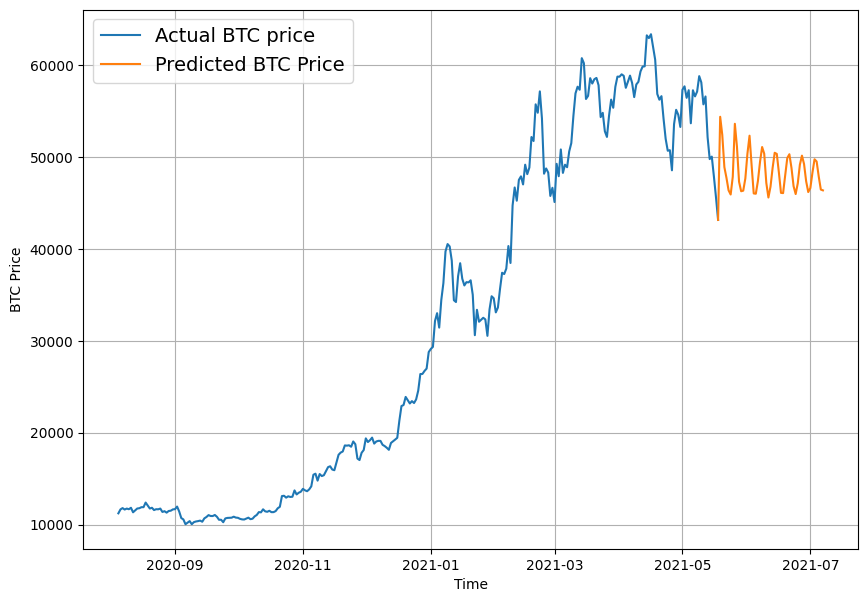

In [ ]:
# Plot future prices predictions of BitCoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start= 2500, format = '-', label='Actual BTC price')
plot_time_series(next_time_steps, future_forecasts, format = '-', label = 'Predicted BTC Price')

### Model 10: Why forecasting is BS (which is true, tho 😗😗) (Turkey problem)

In [ ]:
# Introducing a turkey problem to the BitCoin historical data
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacture an extra price on the end
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
btc_price[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 43144.4712908603]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

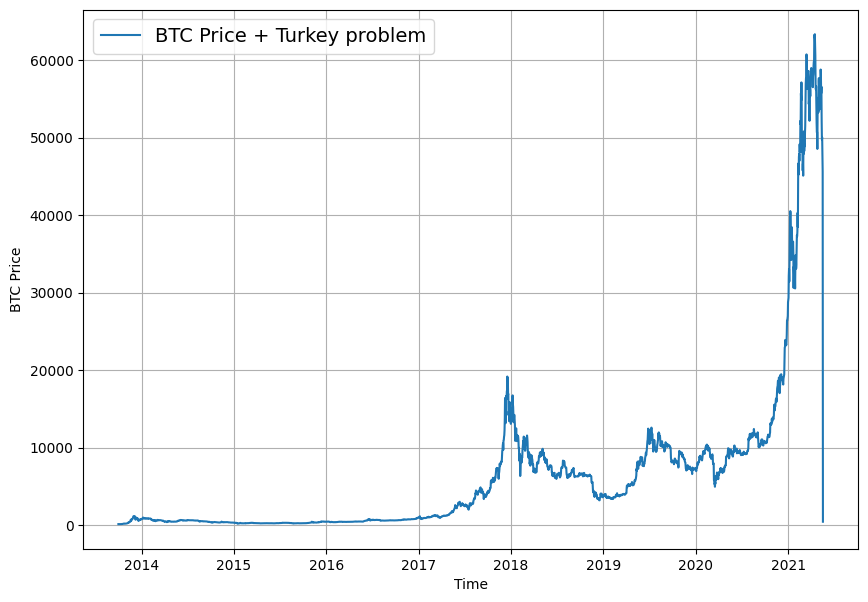

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(btc_timesteps_turkey,
                 btc_price_turkey, format = '-', label = 'BTC Price + Turkey problem'
                 )

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create train and test sets for the turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey),
                                         window_size = WINDOW_SIZE,
                                         horizon = HORIZON)

# Make test-train splits
X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_test), len(y_train)

(2224, 556, 556, 2224)

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Clone the model 1 architecture and fit the turkey data to it
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = 'model_10_turkey_model'

# Compile the model
turkey_model.compile(loss='mae',
                     optimizer=tf.keras.optimizers.Adam())

turkey_model.fit(X_train, y_train,
                 epochs = 100,
                 verbose = 0,
                 batch_size = 128,
                 validation_data = (X_test,y_test),
                 callbacks= [create_model_checkpoint(model_name = turkey_model.name)])


In [ ]:
# Evaluate model on the test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 8ms/step - loss: 751.0867


751.086669921875

In [ ]:
# Load the best turkey model and evaluate it on test data
turkey_model = tf.keras.models.load_model('model_experiments/model_10_turkey_model')
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 5ms/step - loss: 646.6036


646.6035766601562

In [ ]:
# Make predictions with the model
turkey_preds =  make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8837.092, 8769.417, 9020.883, 8758.786, 8725.723, 8739.506,
       8641.214, 8516.008, 8448.137, 8508.798], dtype=float32)>

In [ ]:
# Evaluate the model
turkey_results = evaluate_preds(y_true = y_test,
                                y_pred =turkey_preds)
turkey_results

{'mae': 17131.668,
 'mape': 121.37462,
 'mase': 26.511309,
 'mse': 614627460.0,
 'rmse': 23718.615}

From the above results, we can say that even a sudden change in the data point of the time-series data, can make the model to perform very poorly, thus failing to predict accurately.

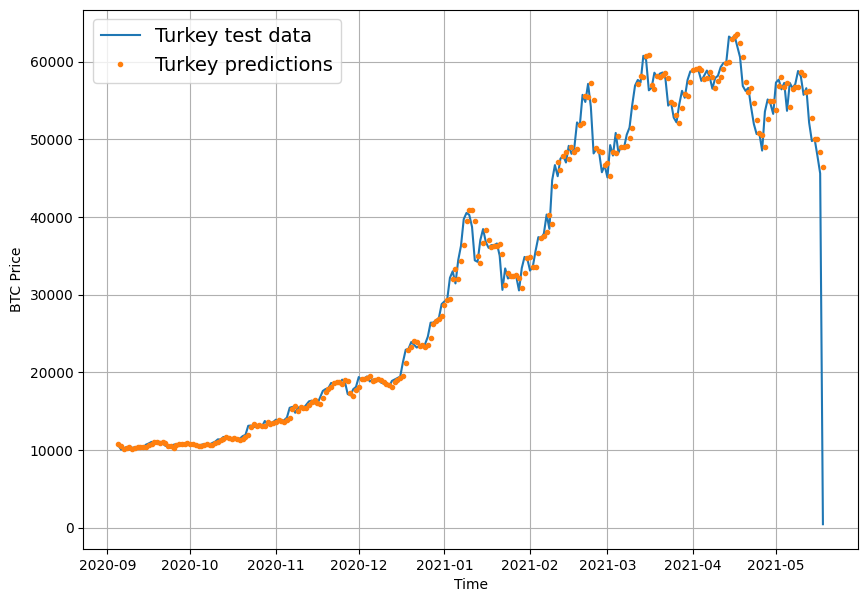

In [ ]:
plt.figure(figsize=(10,7))
offset = 300
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = btc_price_turkey[-len(y_test):],
                 format='-',
                 label = 'Turkey test data',
                 start = offset)

plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = turkey_preds,
                 label = 'Turkey predictions',
                 start = offset)


### Comparing the models

In [ ]:
# Compare different models
model_results = pd.DataFrame({'naive_model': naive_results,
                              'model_1_dense_w7_h1': model_1_results,
                              'model_2_dense_w30_h1': model_2_results,
                              'model_3_dense_w30_h7': model_3_results,
                              'model_4_conv1d': model_4_results,
                              'model_5_lstm': model_5_results,
                              'model_6_multivariate':model_6_results,
                              'model_7_nbeats': model_7_results,
                              'model_8_ensemble':ensemble_results_median,
                              'model_10_turkey': turkey_results
                              }).T

In [ ]:
model_results

,mae,mape,mase,mse,rmse
naive_model,567.980225,2.516525,0.999570,1.147547e+06,1071.236206
model_1_dense_w7_h1,564.893494,2.527822,0.992361,1.160545e+06,1077.285767
model_2_dense_w30_h1,633.898254,2.869012,1.108060,1.377254e+06,1173.564575
model_3_dense_w30_h7,1248.672974,5.620928,2.221944,5.380992e+06,1433.550049
model_4_conv1d,573.694824,2.570132,1.007823,1.195146e+06,1093.227539
model_5_lstm,573.694824,2.570132,1.007823,1.195146e+06,1093.227539
model_6_multivariate,568.854309,2.572592,0.999319,1.159616e+06,1076.854858
model_7_nbeats,569.199646,2.610354,0.999926,1.165780e+06,1079.712769
model_8_ensemble,568.700867,2.570143,0.999050,1.145768e+06,1070.405518
model_10_turkey,17131.667969,121.374619,26.511309,6.146275e+08,23718.615234


<Axes: >

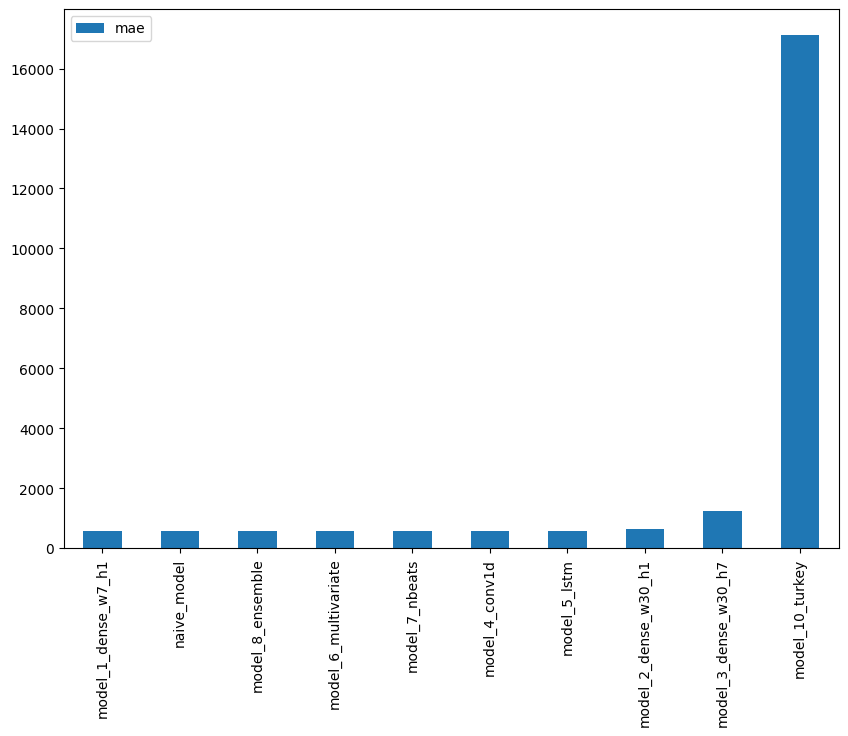

In [ ]:
# Sort model results by MAE and plot them
model_results[['mae']].sort_values(by='mae').plot(figsize=(10, 7), kind='bar')